In [1]:
%matplotlib inline

import os
import sys

try:
    current_path=os.path.dirname(os.path.realpath(__file__))
except NameError:
    current_path=os.getcwd()

for i in range(3):
    sys.path.append(current_path)
    current_path=os.path.dirname(current_path)

from param_global import *

In [6]:
def image_resize(image,dim = (100, 100)):
    image_resized=cv2.resize(image, dim, interpolation = cv2.INTER_CUBIC)
    return image_resized

In [ ]:
def plot_images(images):
    #Args: List of images
    for i,img in enumerate(images):
        plt.subplot(1,len(images),i+1)
        img=plt.imshow(img)
        img.set_cmap('hot')
        plt.axis("off")

In [20]:
class data(object):
    
    def generate_i_Image(self):
        if os.path.exists(os.path.join(self.image_data_dir,self.SDSS_ID+"-i.csv")):
            image_df=pd.read_csv(os.path.join(self.image_data_dir,self.SDSS_ID+"-i.csv"),header=None)
            
            return image_df.as_matrix()
        else:
            return None
    def generate_g_Image(self):
        if os.path.exists(os.path.join(self.image_data_dir,self.SDSS_ID+"-g.csv")):
            image_df=pd.read_csv(os.path.join(self.image_data_dir,self.SDSS_ID+"-g.csv"),header=None)
            return image_df.as_matrix()
        else:
            return None
    
    
    def __init__(self,SDSS_ID,logMstar,err_logMstar,Distance,image_data_dir):
        self.SDSS_ID=SDSS_ID
        self.logMstar=logMstar
        self.err_logMstar=err_logMstar
        self.Distance=Distance
        self.image_data_dir=image_data_dir
        self.i_image=self.generate_i_Image()
        self.g_image=self.generate_g_Image()  
        self.i_image_resized=image_resize(self.i_image)
        self.g_image_resize=image_resize(self.g_image)
        
        
        
    def plot_image(self):
        if self.i_image!=None:
            plt.subplot(121)
            img=plt.imshow(self.i_image)
            img.set_cmap('hot')
            plt.title("I band Image")
            plt.axis('off')
        if self.g_image!=None:
            plt.subplot(122)
            img=plt.imshow(self.g_image)
            plt.title("G band Image")
            img.set_cmap('hot')
            plt.axis('off')
        plt.figure()
        if self.i_image_resized!=None:
            plt.subplot(121)
            img=plt.imshow(self.i_image_resized)
            img.set_cmap('hot')
            plt.title("I band Resized Image")
            plt.axis('off')
        if self.g_image_resize!=None:
            plt.subplot(122)
            img=plt.imshow(self.g_image_resize)
            plt.title("G band Resized Image")
            img.set_cmap('hot')
            plt.axis('off')
   

In [21]:
def read_target_data_csv(target_data_csv_path):
    target_data_df=pd.read_csv(target_data_csv_path,sep=";",dtype={"SDSS_ID":str,'logMstar':np.float64, 'err_logMstar':np.float64, 'Distance':np.float64})
    return target_data_df
    

In [22]:
def get_Data(target_data_df,image_data_path):
    
    data_objects=[]
    for index in range(len(target_data_df)):
        SDSS_ID=target_data_df.iloc[index]["SDSS_ID"]
        logMstar=target_data_df.iloc[index]["logMstar"]
        err_logMstar=target_data_df.iloc[index]["err_logMstar"]
        Distance=target_data_df.iloc[index]["Distance"]

        data_objects.append(data(SDSS_ID,logMstar,err_logMstar,Distance,image_data_path))
    return data_objects

In [23]:
target_data_csv_path=os.path.join(data_path,"sample.csv")
sample_target_data_df=read_target_data_csv(target_data_csv_path)
sample_data_object=get_Data(sample_target_data_df,sample_data_path)

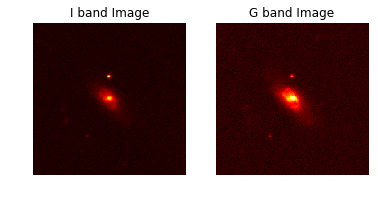

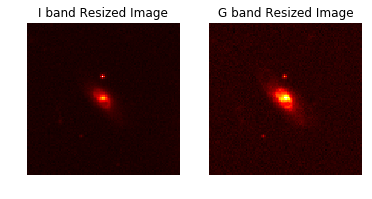

In [27]:
sample_data_object[0].plot_image()